In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import resample

# Read the CSV file
df = pd.read_csv("C:/Users/HP/Downloads/Loan_default.csv")
df

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


In [2]:
# Encoding categorical features
df['Education'] = df['Education'].replace({'High School': 0, "Bachelor's": 1, "Master's": 2, 'PhD': 3})
df['EmploymentType'] = df['EmploymentType'].replace({'Unemployed': 0, 'Part-time': 1, 'Self-employed': 2, 'Full-time': 3})
df['MaritalStatus'] = df['MaritalStatus'].replace({'Single': 0, 'Divorced': 1, 'Married': 2})
df['HasMortgage'] = df['HasMortgage'].replace({'No': 0, 'Yes': 1})
df['HasDependents'] = df['HasDependents'].replace({'No': 0, 'Yes': 1})
df['LoanPurpose'] = df['LoanPurpose'].replace({'Education': 0, 'Home': 1, 'Auto': 2, 'Business': 3, 'Other': 4})
df['HasCoSigner'] = df['HasCoSigner'].replace({'No': 0, 'Yes': 1})

df = df.drop(columns=["LoanID"])
#df = df.drop(columns=["Age"])
#df = df.drop(columns=["Income"])
#df = df.drop(columns=["LoanAmount"])
#df = df.drop(columns=["CreditScore"])
#df = df.drop(columns=["MonthsEmployed"])
#df = df.drop(columns=["NumCreditLines"])
#df = df.drop(columns=["InterestRate"])
#df = df.drop(columns=["LoanTerm"])
#df = df.drop(columns=["DTIRatio"])
#df = df.drop(columns=["Education"])
#df = df.drop(columns=["EmploymentType"])
#df = df.drop(columns=["MaritalStatus"])
#df = df.drop(columns=["HasMortgage"])
#df = df.drop(columns=["HasDependents"])
#df = df.drop(columns=["LoanPurpose"])
#df = df.drop(columns=["HasCoSigner"])
df

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,1,3,1,1,1,4,1,0
1,69,50432,124440,458,15,1,4.81,60,0.68,2,3,2,0,0,4,1,0
2,46,84208,129188,451,26,3,21.17,24,0.31,2,0,1,1,1,2,0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,0,3,2,0,0,3,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,1,0,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,1,3,2,0,0,4,0,0
255343,32,51953,189899,511,14,2,11.55,24,0.21,0,1,1,0,0,1,0,1
255344,56,84820,208294,597,70,3,5.29,60,0.50,0,2,2,1,1,2,1,0
255345,42,85109,60575,809,40,1,20.90,48,0.44,0,1,0,1,1,4,0,0


In [3]:
data = df.describe()
data

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,1.496235,1.498122,1.001136,0.500014,0.500268,1.999334,0.500108,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,1.117212,1.117357,0.816696,0.500001,0.500001,1.413615,0.500001,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,2.000000,2.000000,2.000000,1.000000,1.000000,3.000000,1.000000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,3.000000,3.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [4]:
feature = data.columns
z = list[enumerate(feature)]
feature

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education',
       'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents',
       'LoanPurpose', 'HasCoSigner', 'Default'],
      dtype='object')

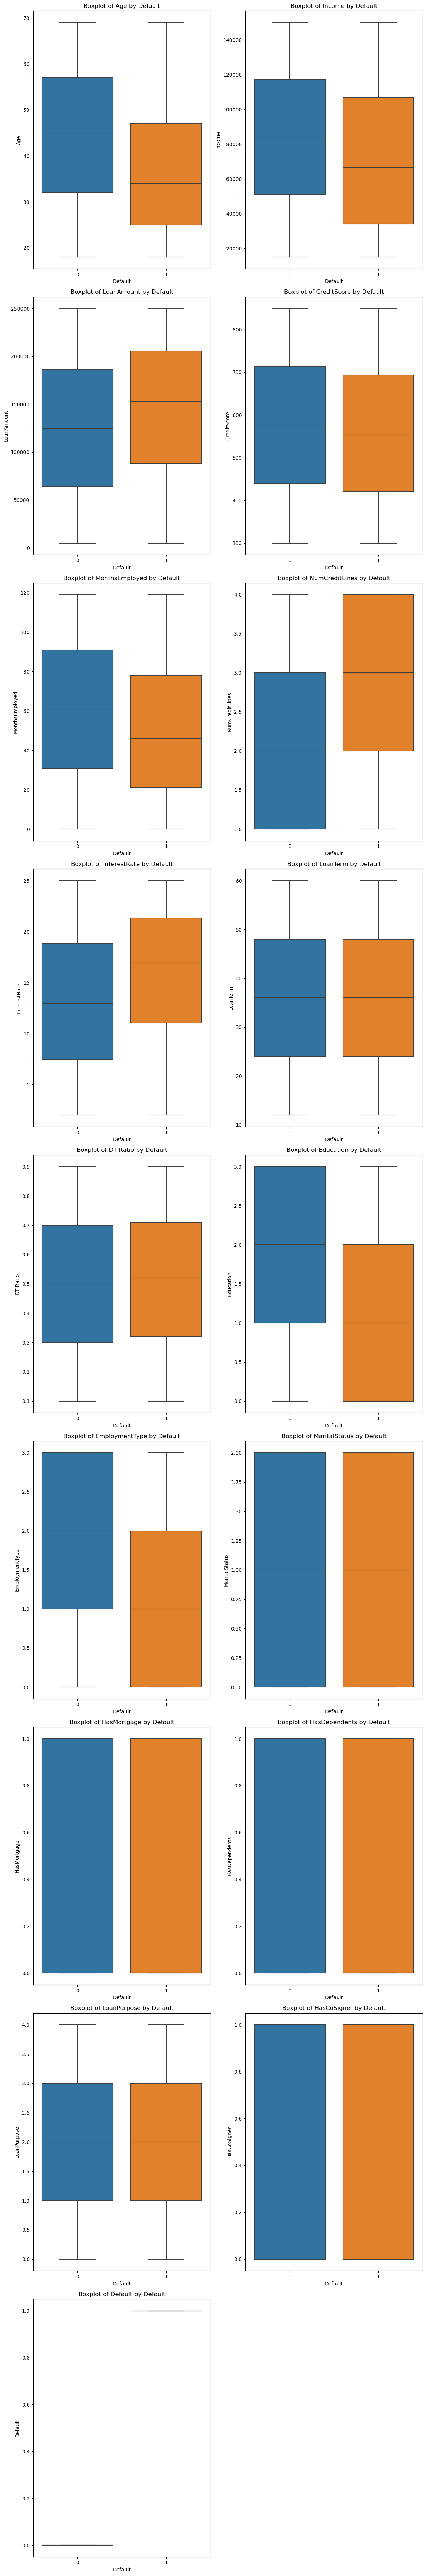

In [5]:
num_features = len(feature)
num_rows = (num_features + 1) // 2

plt.figure(figsize=(12, num_rows * 8))
for idx, feature_name in enumerate(feature):
    plt.subplot(num_rows, 2, idx + 1)
    sns.boxplot(x='Default', y=feature_name, data=df)
    plt.title(f'Boxplot of {feature_name} by Default')

plt.tight_layout()
plt.show()

In [6]:
# Apply IQR function
def iqr_(df, ft):
    q1 = df[ft].quantile(0.25)
    q3 = df[ft].quantile(0.75)
    iqr = q3 - q1
    ul = q3 + 1.5 * iqr
    ll = q1 - 1.5 * iqr
    df[ft] = np.where(df[ft] > ul, ul, np.where(df[ft] < ll, ll, df[ft]))

for col in df.columns:
    if col != 'Default':
        iqr_(df, col)

In [7]:
# Split features and target variable
X = df.drop(['Default'], axis=1)
y = df['Default']

In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

In [9]:
# Function to get user input for sampling method
def get_sampling_method():
    print("Choose a sampling method:")
    print("1: Upsampling using sklearn")
    print("2: Downsampling using sklearn")
    print("3: SMOTE")
    print("4: ADASYN")
    print("5: SMOTE+ENN")
    print("6: Random Over Sampling")
    print("7: Random Under Sampling")
    choice = int(input("Enter the number of your choice: "))
    return choice

In [10]:
# Function to perform sampling
def perform_sampling(choice, X_train, y_train):
    if choice == 1:
        X_train_res, y_train_res = resample(X_train[y_train == 1], 
                                             replace=True, 
                                             n_samples=len(y_train[y_train == 0]), 
                                             random_state=42)
        X_train_res = np.vstack((X_train[y_train == 0], X_train_res))
        y_train_res = np.hstack((y_train[y_train == 0], [1] * len(y_train[y_train == 0])))
    elif choice == 2:
        X_train_res, y_train_res = resample(X_train[y_train == 0], 
                                             replace=True, 
                                             n_samples=len(y_train[y_train == 1]), 
                                             random_state=42)
        X_train_res = np.vstack((X_train[y_train == 1], X_train_res))
        y_train_res = np.hstack((y_train[y_train == 1], [0] * len(y_train[y_train == 1])))
    elif choice == 3:
        smote = SMOTE(random_state=42)
        X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
    elif choice == 4:
        adasyn = ADASYN(random_state=42)
        X_train_res, y_train_res = adasyn.fit_resample(X_train, y_train)
    elif choice == 5:
        smote_enn = SMOTEENN(random_state=42)
        X_train_res, y_train_res = smote_enn.fit_resample(X_train, y_train)
    elif choice == 6:
        ros = RandomOverSampler(random_state=42)
        X_train_res, y_train_res = ros.fit_resample(X_train, y_train)
    elif choice == 7:
        rus = RandomUnderSampler(random_state=42)
        X_train_res, y_train_res = rus.fit_resample(X_train, y_train)
    else:
        print("Invalid choice. Using default Random Over Sampling.")
        ros = RandomOverSampler(random_state=42)
        X_train_res, y_train_res = ros.fit_resample(X_train, y_train)
    
    return X_train_res, y_train_res

In [11]:
# Get sampling method choice from user
sampling_choice = get_sampling_method()
X_train_res, y_train_res = perform_sampling(sampling_choice, X_train, y_train)

Choose a sampling method:
1: Upsampling using sklearn
2: Downsampling using sklearn
3: SMOTE
4: ADASYN
5: SMOTE+ENN
6: Random Over Sampling
7: Random Under Sampling


Enter the number of your choice:  6


In [12]:
# Scale the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

In [13]:
model = XGBClassifier()
model.fit(X_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [21]:
print('Scores on Train Dataset:~')
# predict the target on the train dataset
predict_train = model.predict(X_train)
print('Target',predict_train) 

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print('accuracy_score : ', accuracy_train)

# Precision Score on train dataset
prec = precision_score(y_train,predict_train)
print("Precision_score :", prec)

# Recall Score on train dataset
recall = recall_score(y_train,predict_train)
print("Recall score :", recall)

# F1 Score on train dataset
f1 = f1_score(y_train,predict_train)
print("F1 score:", f1)


print('\nScores on Test Dataset:~')
# predict the target on the test dataset
predict_test = model.predict(X_test)
print('Target',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score : ', accuracy_test)

# Precision Score on test dataset
prec = precision_score(y_test,predict_test)
print("Precision_score :", prec)

# Recall Score on test dataset
recall = recall_score(y_test,predict_test)
print("Recall score :", recall)

# F1 Score on test dataset
f1 = f1_score(y_test,predict_test)
print("F1 score:", f1)

Scores on Train Dataset:~
Target [0 0 0 ... 0 0 0]
accuracy_score :  0.8838496319122761
Precision_score : 0.0
Recall score : 0.0
F1 score: 0.0

Scores on Test Dataset:~
Target [0 0 0 ... 0 0 0]
accuracy_score :  0.6977290524667189
Precision_score : 0.2165680473372781
Recall score : 0.6245733788395904
F1 score: 0.3216168717047452
